In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, learning_curve


In [2]:
# Load the final feature engineered data
df_final = pd.read_csv('final_feature_engineered_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'final_feature_engineered_data.csv'

In [3]:
# Separate the features and target
X = df_final.drop(columns=['Log_Arsenic'])
y = df_final['Log_Arsenic']

In [4]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [7]:
# Load the best model
best_model = joblib.load('./Saved Models/best_stacking_model.pkl')

In [8]:
# Introduction
print("This notebook contains visualizations for the research project.")


This notebook contains visualizations for the research project.


# Data Overview and Preprocessing

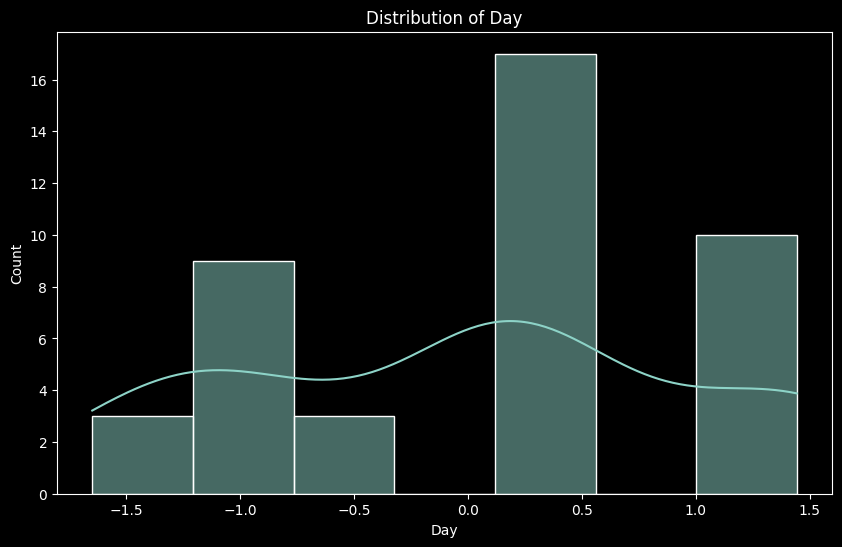

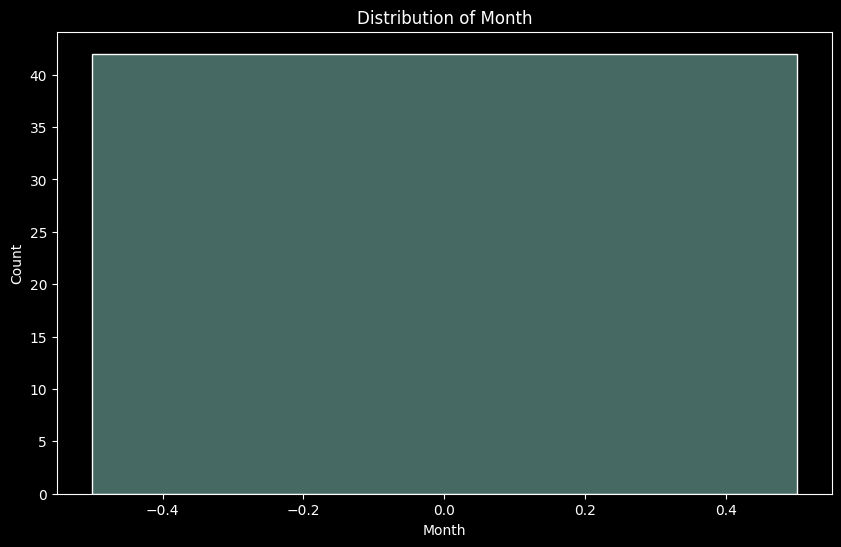

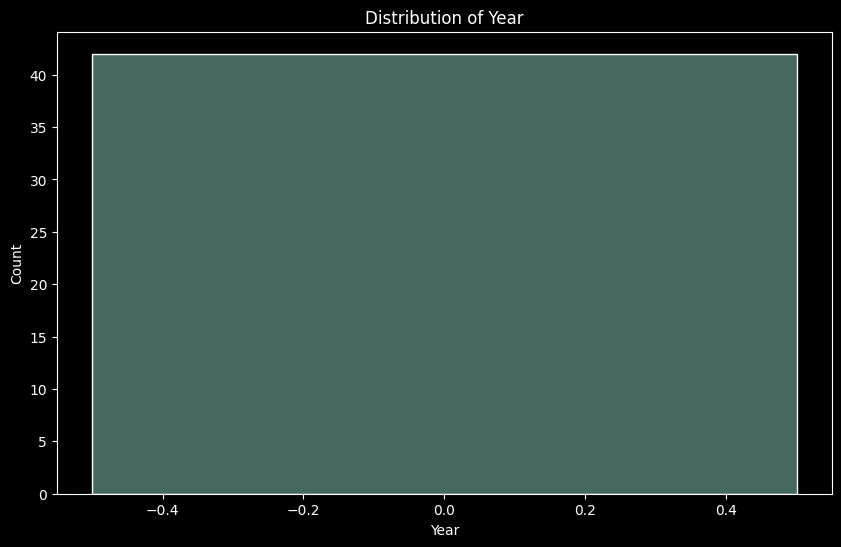

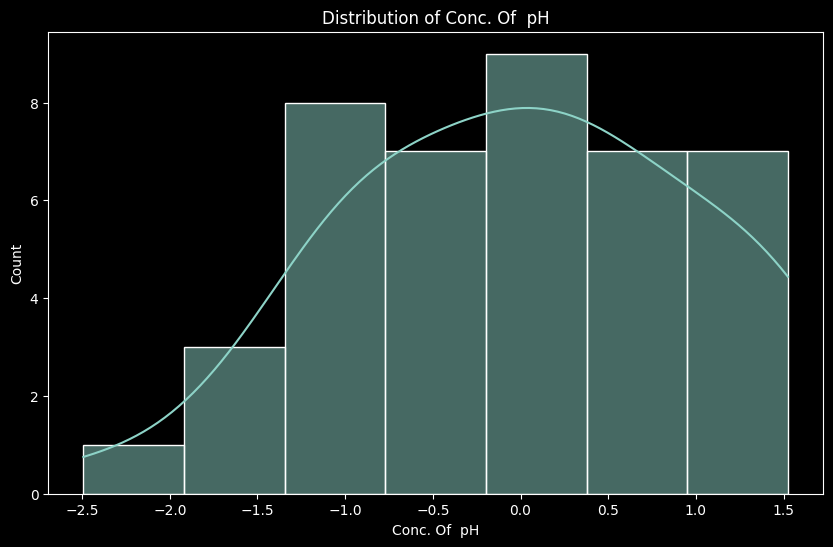

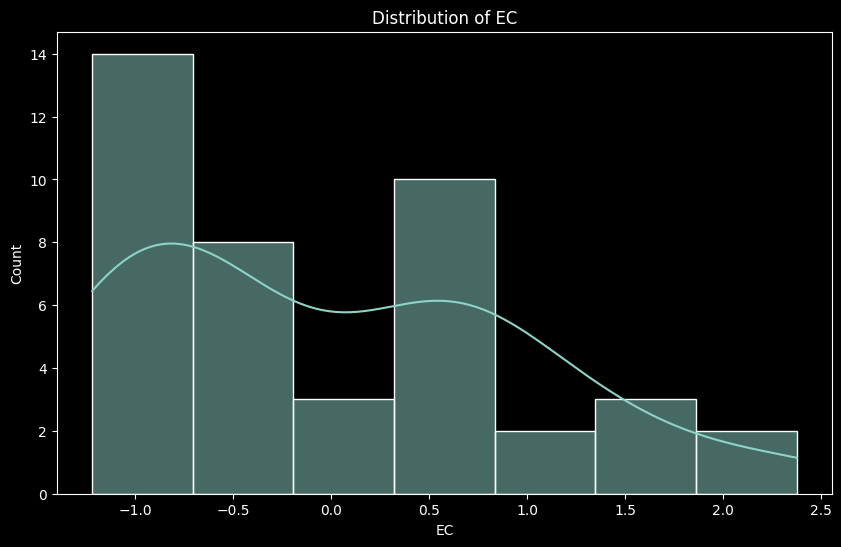

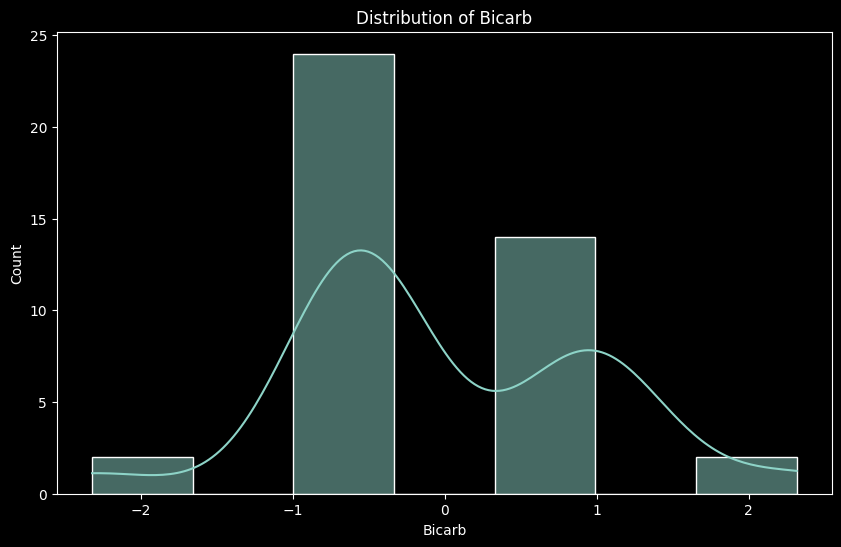

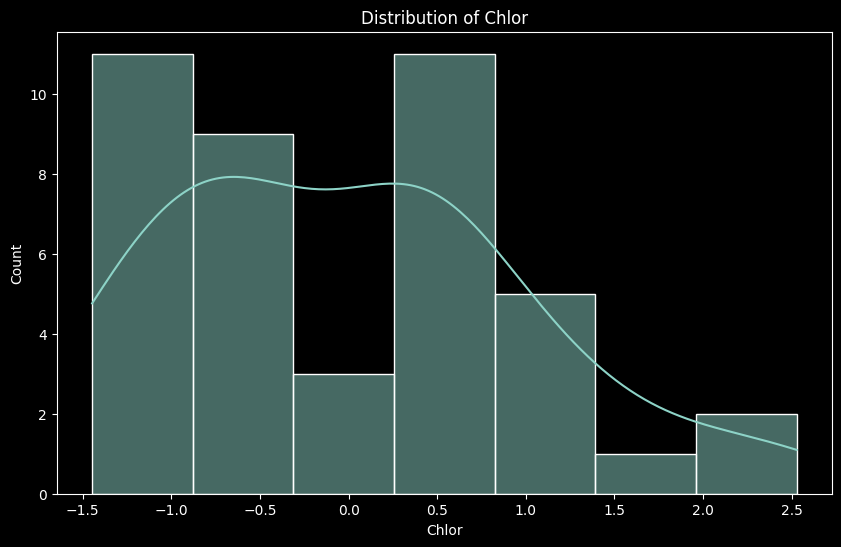

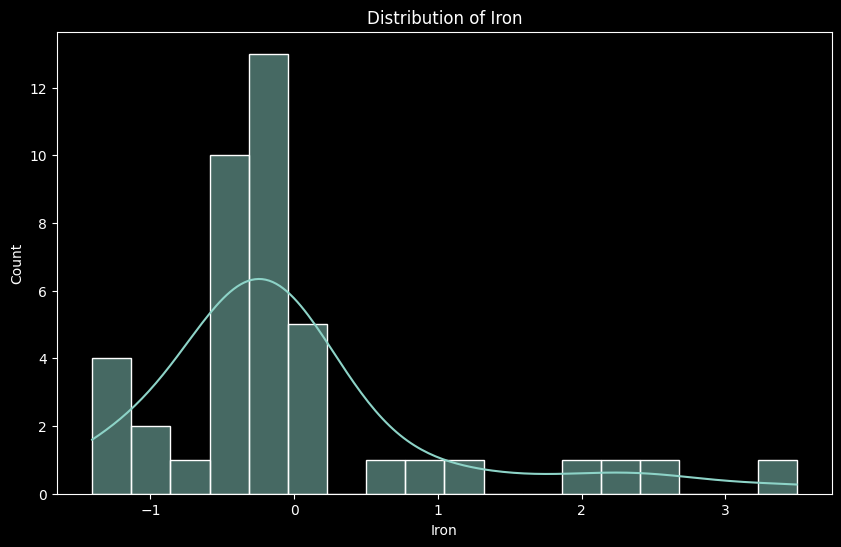

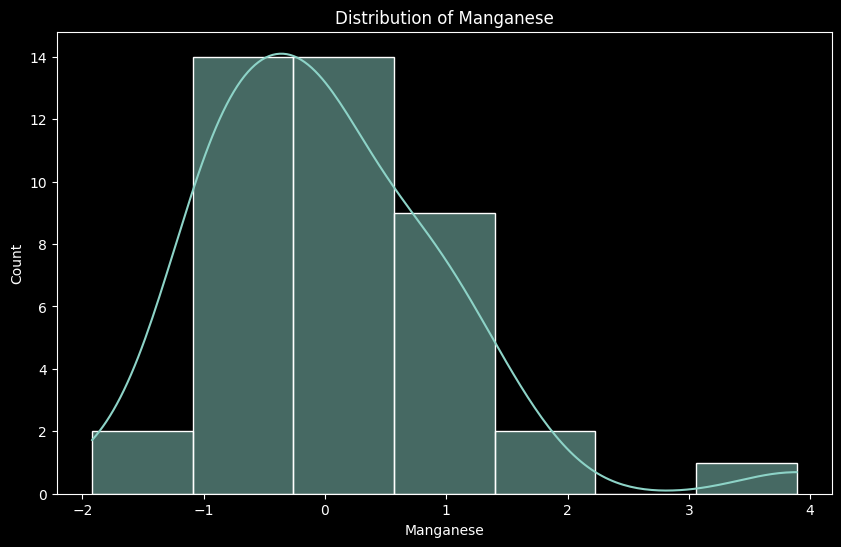

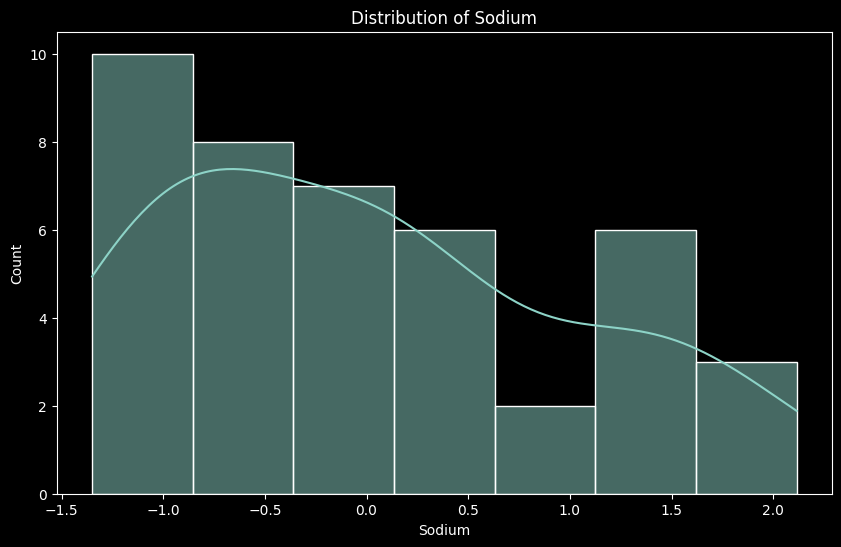

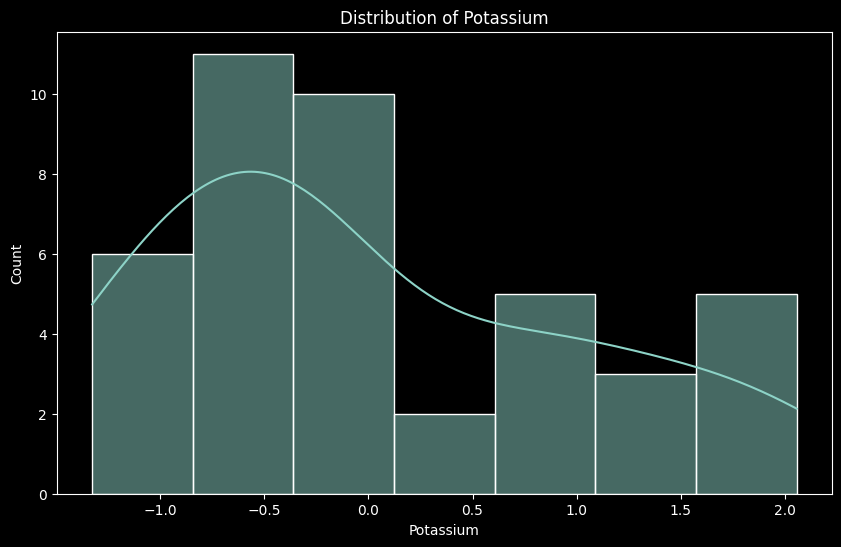

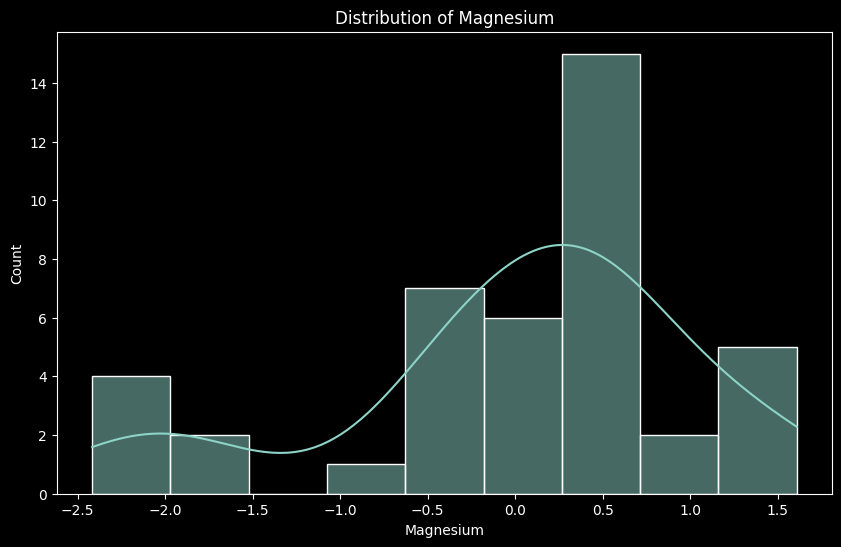

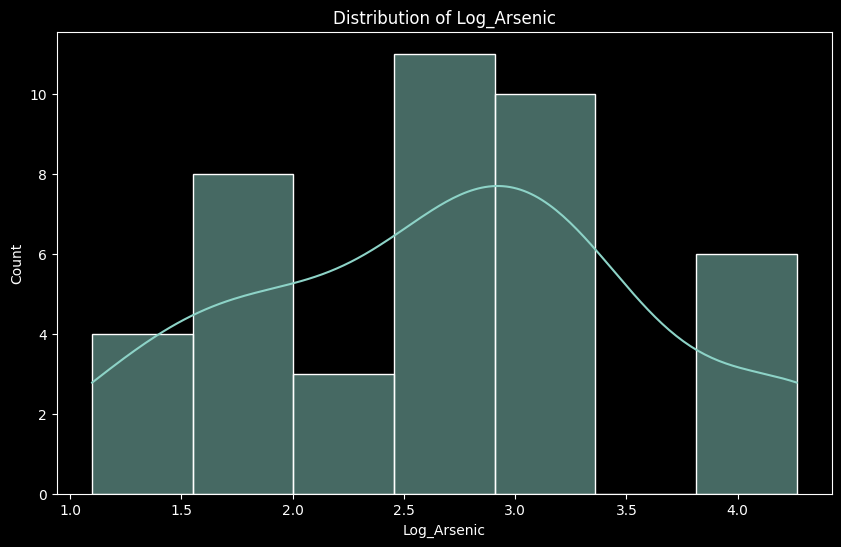

In [9]:


## Data Distribution
for column in df_final.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_final[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

## Correlation Matrix

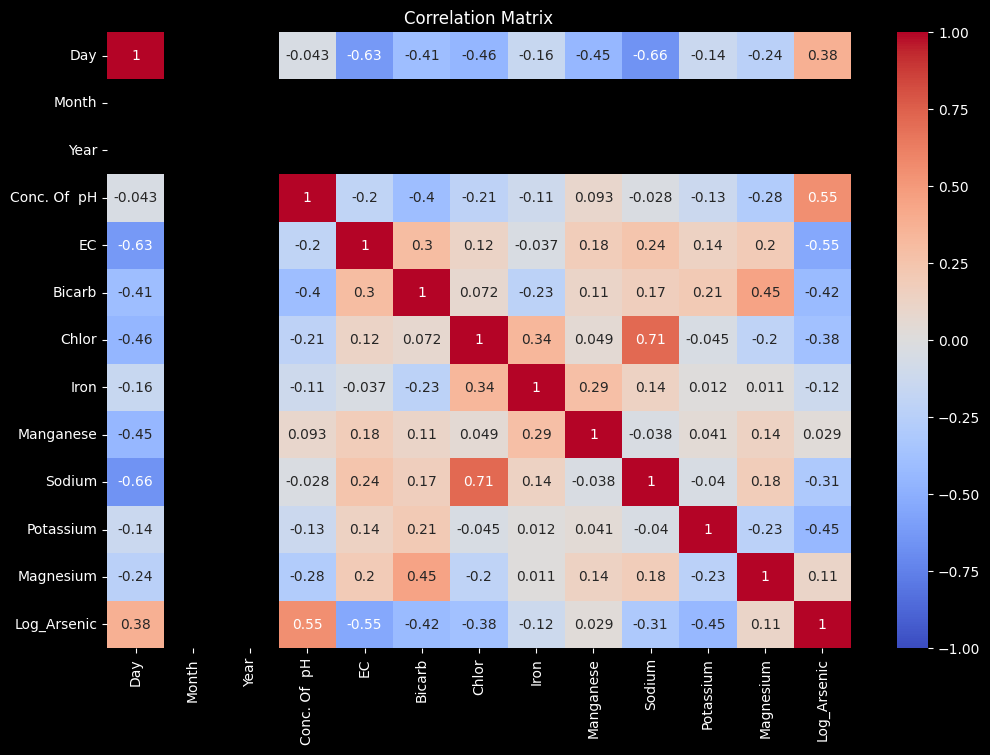

In [10]:

plt.figure(figsize=(12, 8))
sns.heatmap(df_final.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Feature Engineering

## Feature Importance

In [11]:

feature_importance = best_model.named_estimators_['rf'].feature_importances_
features = df_final.columns[:-1]  # Exclude the target column

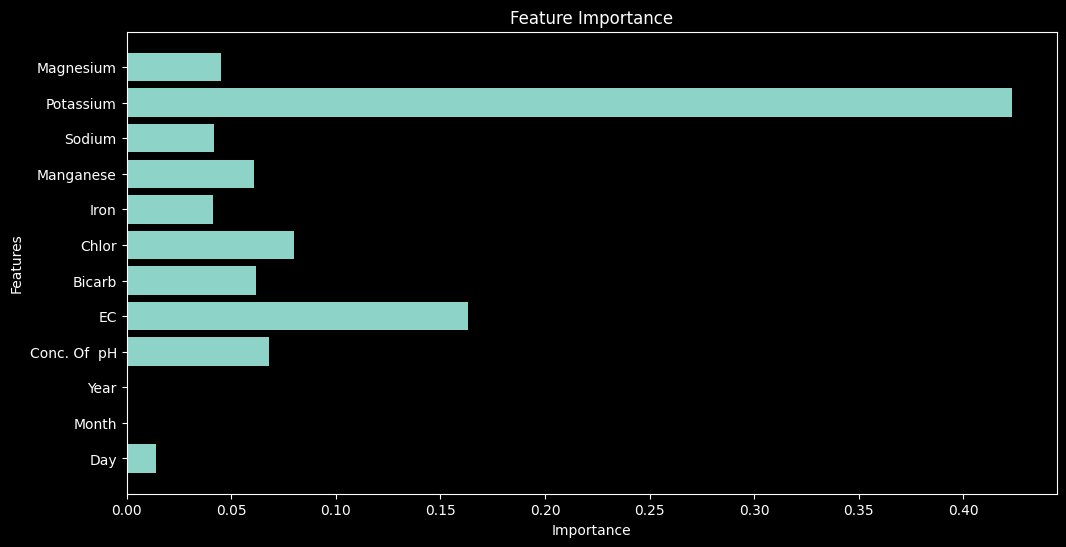

In [12]:
plt.figure(figsize=(12, 6))
plt.barh(features, feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Model Performance Comparison

## Load the results DataFrame for individual models

In [13]:
individual_results_df = pd.read_csv('./model_comparison_results.csv')


In [14]:
individual_results_df

,Unnamed: 0,CV_R2_Score,MAE,MSE,R2
0,Linear Regression,0.167647,4.561923e-01,4.337293e-01,0.518584
1,Polynomial Regression,0.217806,9.128500e-16,1.922848e-30,1.000000
2,Ridge Regression,0.317766,4.289743e-01,3.494912e-01,0.612083
3,Lasso Regression,-0.311644,8.133298e-01,9.699867e-01,-0.076633
4,Elastic Net Regression,-0.288568,8.092209e-01,9.534373e-01,-0.058264
5,Support Vector Regression,0.846930,2.720220e-01,1.931032e-01,0.785666
6,Decision Tree Regression,0.258534,4.560451e-01,7.352958e-01,0.183861
7,Random Forest Regression,0.634661,4.198173e-01,5.731295e-01,0.363857
8,Gradient Boosting Regression,0.647519,4.061689e-01,6.423270e-01,0.287051
9,K-Nearest Neighbors Regression,-0.032279,4.831339e-01,6.104306e-01,0.322455


In [29]:
## Create a DataFrame with the performance metrics of the top models
model_performance_individual = individual_results_df[['Unnamed: 0','CV_R2_Score', 'MAE', 'MSE', 'R2']].rename(columns={'Unnamed: 0': 'Model'})

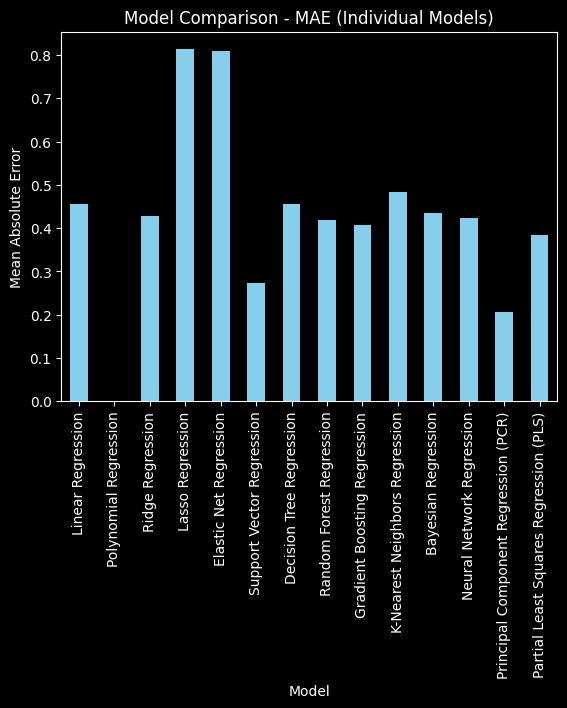

In [16]:
## Bar plot for MAE (Individual Models)
model_performance_individual.plot(x='Model', y='MAE', kind='bar', legend=False, color='skyblue')
plt.title('Model Comparison - MAE (Individual Models)')
plt.ylabel('Mean Absolute Error')
plt.show()

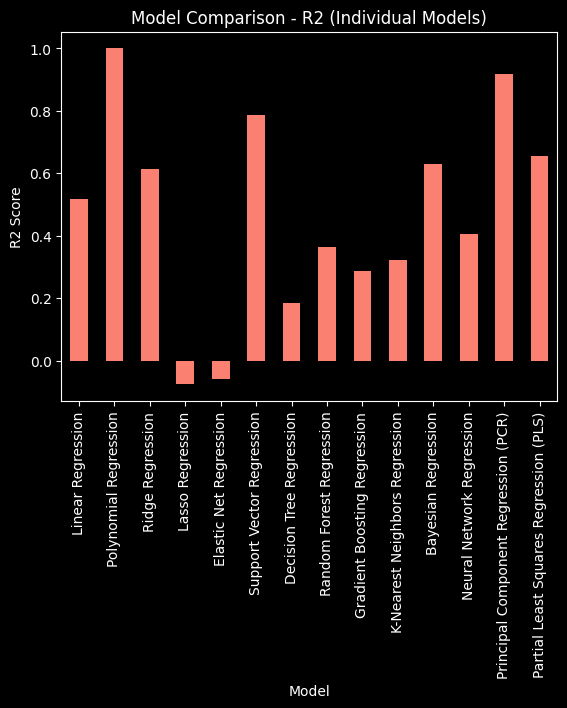

In [17]:
## Bar plot for R2 (Individual Models)
model_performance_individual.plot(x='Model', y='R2', kind='bar', legend=False, color='salmon')
plt.title('Model Comparison - R2 (Individual Models)')
plt.ylabel('R2 Score')
plt.show()

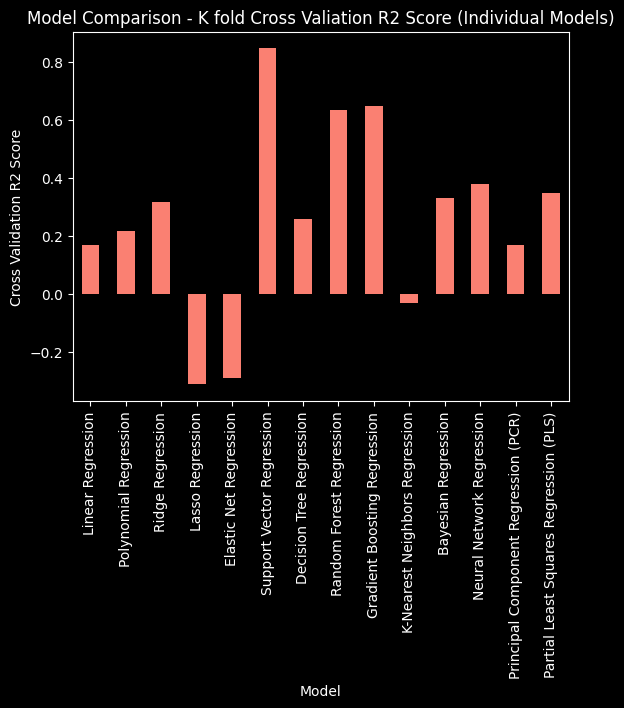

In [30]:
## Bar plot for R2 (Individual Models)
model_performance_individual.plot(x='Model', y='CV_R2_Score', kind='bar', legend=False, color='salmon')
plt.title('Model Comparison - K fold Cross Valiation R2 Score (Individual Models)')
plt.ylabel('Cross Validation R2 Score')
plt.show()


# Ensemble Model Results

## Load the results DataFrame for ensemble models

# We Have Created ensemble model with 252 different combination of stacking model

## And Here We are showing the top 15 ensemble models that performed well

In [31]:
# Load the DataFrame
ensemble_results_df = pd.read_csv('ensemble_model_comparison_results.csv')

In [32]:
ensemble_results_df.head()

,Unnamed: 0,CV_Mean_R2,CV_Std_R2,MAE,MSE,R2
0,Stacking_linear_with_ridge,0.081148,0.392351,0.491528,0.381131,0.576965
1,Stacking_linear_with_svr,0.820242,0.140375,0.202634,0.105406,0.883005
2,Stacking_linear_with_bayesian,0.013654,0.257066,0.618847,0.556424,0.382399
3,Stacking_linear_with_rf,0.741289,0.136416,0.381499,0.481085,0.466021
4,Stacking_linear_with_gb,0.740399,0.222841,0.397857,0.615138,0.317230


In [33]:


# Sort the DataFrame by the desired column, for example, 'R2', in descending order
sorted_df = ensemble_results_df.sort_values(by=['R2','CV_Mean_R2'], ascending=False)

# Take the top 15 rows
top_15_df = sorted_df.head(15)


ensemble_results_df = top_15_df


In [34]:
ensemble_results_df

,Unnamed: 0,CV_Mean_R2,CV_Std_R2,MAE,MSE,R2
12,Stacking_linear_with_svr_rf,0.794076,0.183497,0.182704,0.073791,0.918096
41,Stacking_linear_with_ridge_svr_bayesian_rf,0.639876,0.283577,0.198073,0.078027,0.913394
56,Stacking_linear_with_ridge_svr_bayesian_rf_gb,0.404885,0.680023,0.192374,0.087071,0.903356
31,Stacking_linear_with_svr_bayesian_rf,0.728839,0.282440,0.213909,0.089995,0.900110
34,Stacking_linear_with_svr_rf_gb,0.745078,0.201218,0.181319,0.091967,0.897922
51,Stacking_linear_with_svr_bayesian_rf_gb,0.707649,0.298220,0.212961,0.094820,0.894754
22,Stacking_linear_with_ridge_svr_rf,0.742348,0.262482,0.224755,0.099006,0.890108
44,Stacking_linear_with_ridge_svr_rf_gb,0.683284,0.281483,0.224097,0.100492,0.888459
1,Stacking_linear_with_svr,0.820242,0.140375,0.202634,0.105406,0.883005
58,Stacking_linear_with_ridge_svr_bayesian_gb_knn,0.481916,0.622022,0.253916,0.106512,0.881777


## Create a DataFrame with the performance metrics of the ensemble models


In [23]:

model_performance_ensemble = ensemble_results_df[['Unnamed: 0', 'CV_Mean_R2', 'MAE', 'MSE', 'R2']].rename(columns={'Unnamed: 0': 'Model'})

## Bar plot for MAE (Ensemble Models)

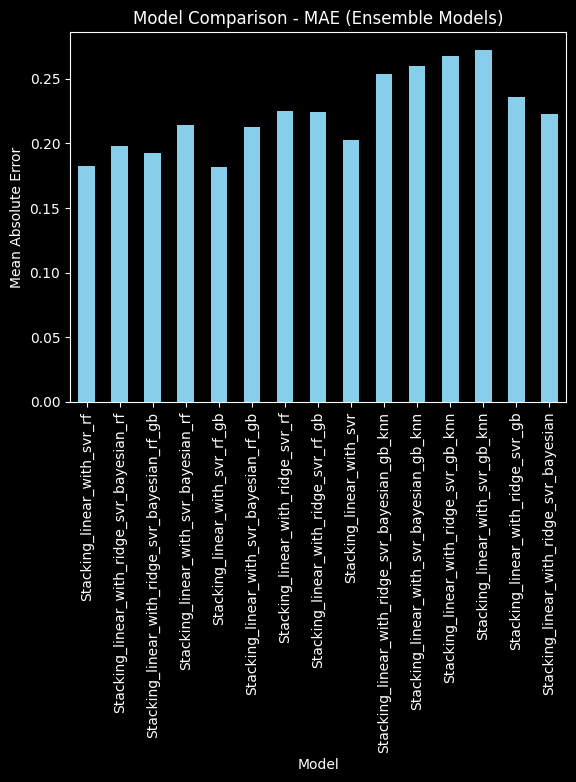

In [24]:

model_performance_ensemble.plot(x='Model', y='MAE', kind='bar', legend=False, color='skyblue')
plt.title('Model Comparison - MAE (Ensemble Models)')
plt.ylabel('Mean Absolute Error')
plt.show()

## Bar plot for R2 (Ensemble Models)

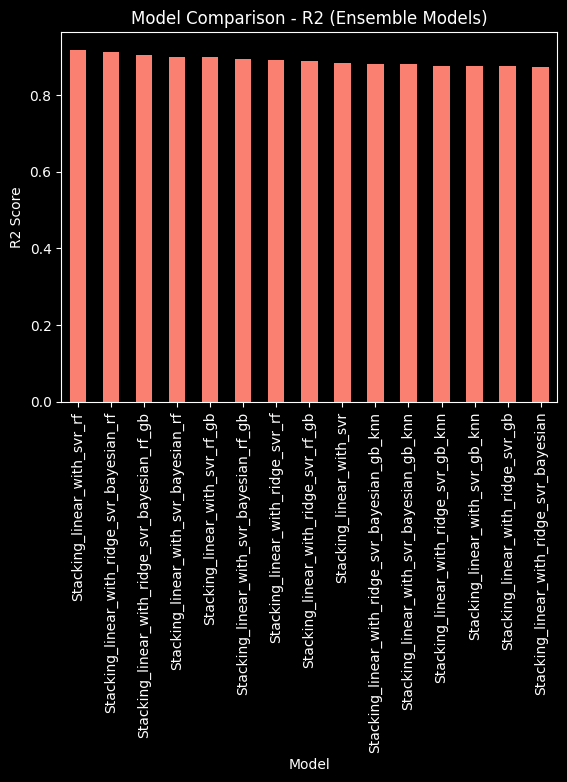

In [25]:
model_performance_ensemble.plot(x='Model', y='R2', kind='bar', legend=False, color='salmon')
plt.title('Model Comparison - R2 (Ensemble Models)')
plt.ylabel('R2 Score')
plt.show()

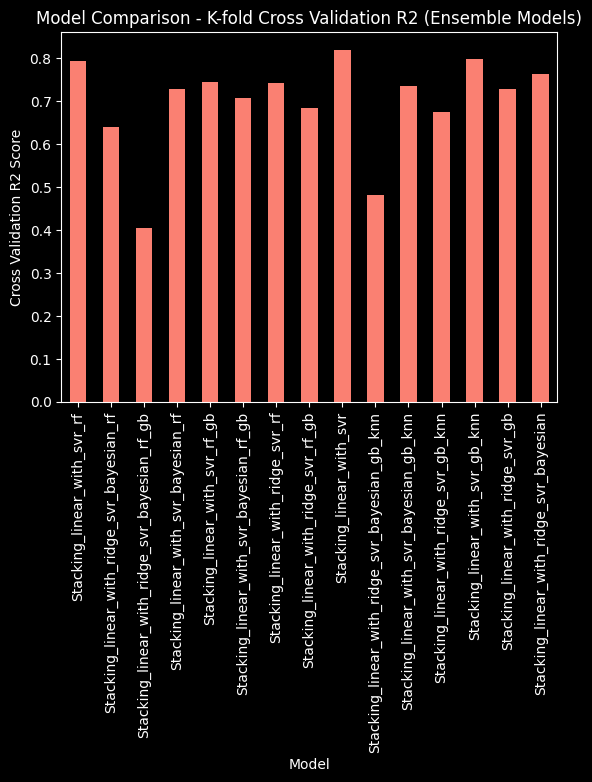

In [36]:
model_performance_ensemble.plot(x='Model', y='CV_Mean_R2', kind='bar', legend=False, color='salmon')
plt.title('Model Comparison - K-fold Cross Validation R2 (Ensemble Models)')
plt.ylabel('Cross Validation R2 Score')
plt.show()

# Training Process

## Learning Curves

In [39]:
from sklearn.model_selection import train_test_split, learning_curve, KFold, LeaveOneOut, cross_val_score

## Adjust the number of splits if needed
n_splits = min(5, len(X_train))

if n_splits <= 1:
    cv = LeaveOneOut()
else:
    cv = KFold(n_splits=n_splits)

In [40]:

train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

c:\Users\Nitro Gaming\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "c:\Users\Nitro Gaming\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\process_executor.py", line 463, in _process_worker
    r = call_item()
        ^^^^^^^^^^^
  File "c:\Users\Nitro Gaming\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\process_executor.py", line 291, in __call__
    return self.fn(*self.arg

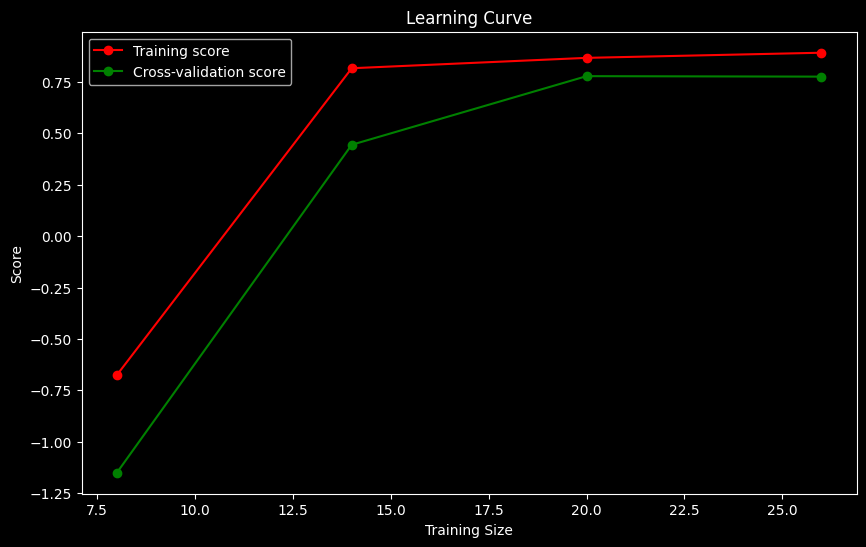

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

# Ensemble Model Architecture

## Diagram of Ensemble Model Architecture

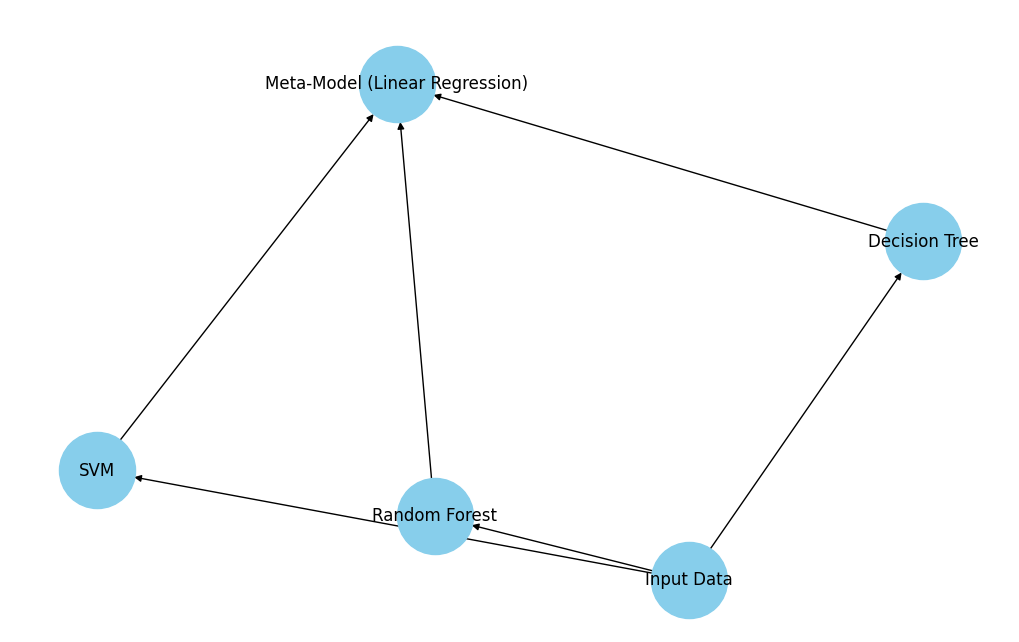

In [42]:
import networkx as nx

G = nx.DiGraph()

# Add nodes for base models and the meta-model
G.add_node('Input Data')
G.add_node('Decision Tree')
G.add_node('SVM')
G.add_node('Random Forest')
G.add_node('Meta-Model (Linear Regression)')

# Add edges to represent the flow
G.add_edge('Input Data', 'Decision Tree')
G.add_edge('Input Data', 'SVM')
G.add_edge('Input Data', 'Random Forest')
G.add_edge('Decision Tree', 'Meta-Model (Linear Regression)')
G.add_edge('SVM', 'Meta-Model (Linear Regression)')
G.add_edge('Random Forest', 'Meta-Model (Linear Regression)')

# Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', arrows=True)
plt.title('Ensemble Model Architecture')
plt.show()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes for input, base models, and ensemble step
G.add_node('Input Data')
G.add_node('Linear Regression')
G.add_node('SVR')
G.add_node('Random Forest')
G.add_node('Ensemble Output (Aggregation)')

# Add edges to represent the flow from input to each base model, and then to ensemble step
G.add_edge('Input Data', 'Linear Regression')
G.add_edge('Input Data', 'SVR')
G.add_edge('Input Data', 'Random Forest')
G.add_edge('Linear Regression', 'Ensemble Output (Aggregation)')
G.add_edge('SVR', 'Ensemble Output (Aggregation)')
G.add_edge('Random Forest', 'Ensemble Output (Aggregation)')

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightgreen', font_size=10, arrows=True, arrowstyle='-|>', arrowsize=20)
plt.title('Ensemble Model Architecture')
plt.show()


# Model Evaluation

## Prediction vs. Actual Values

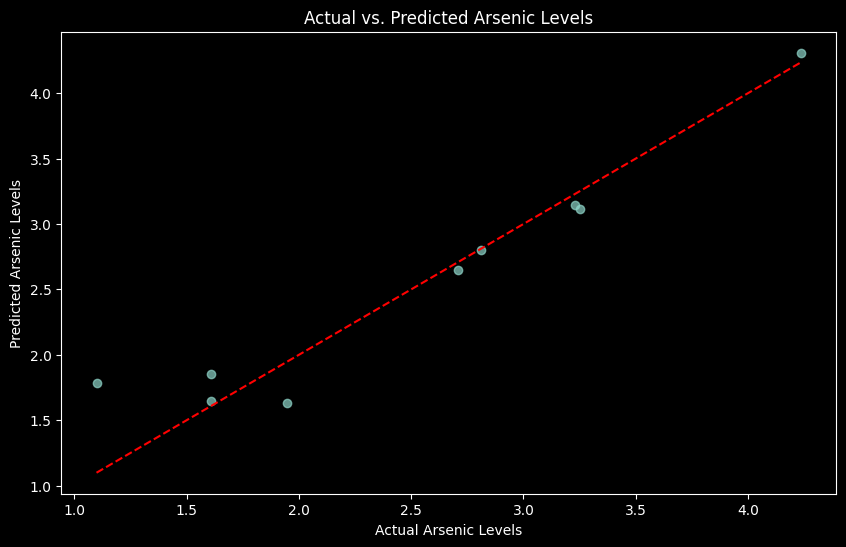

In [43]:
y_pred = best_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Arsenic Levels')
plt.ylabel('Predicted Arsenic Levels')
plt.title('Actual vs. Predicted Arsenic Levels')
plt.show()

## Residual Plots

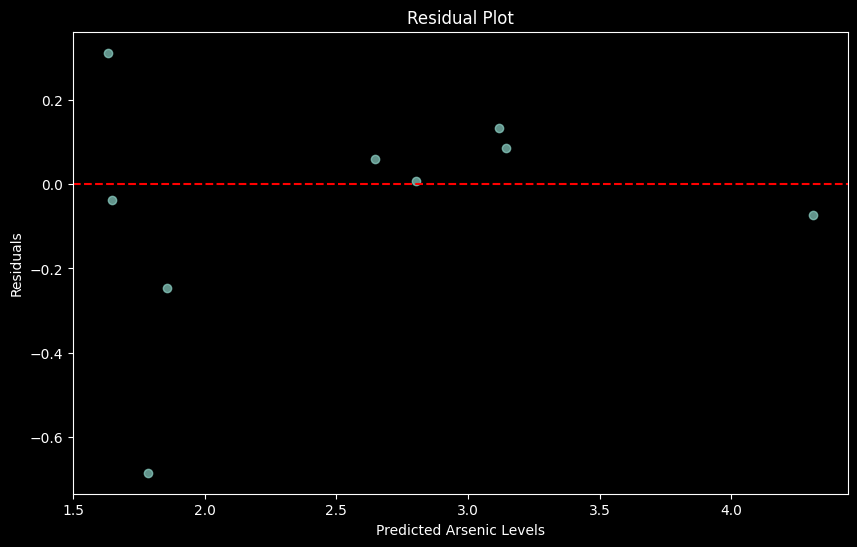

In [44]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Arsenic Levels')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Error Distribution

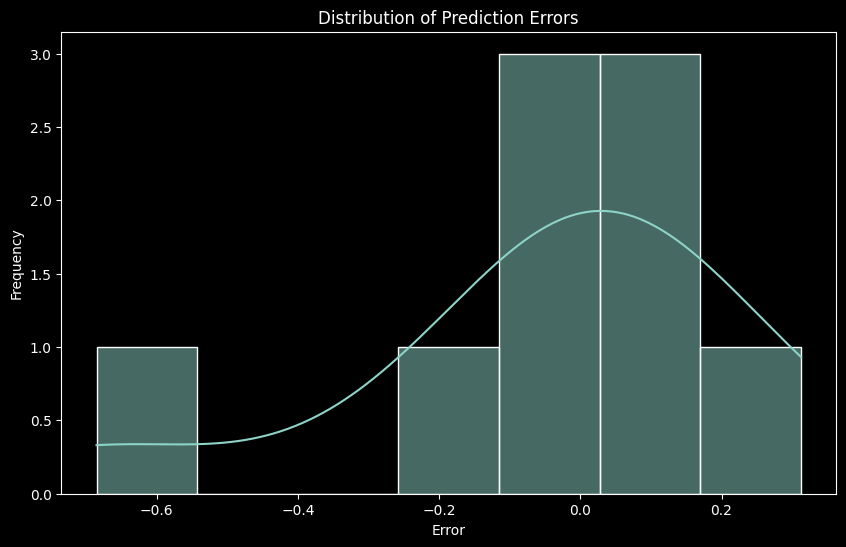

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# Model Explaliner

In [51]:
import shap

svr_model = best_model.named_estimators_['svr']
explainer_svr = shap.Explainer(svr_model, X_train)
shap_values_svr = explainer_svr(X_test)

shap.summary_plot(shap_values_svr, X_test, feature_names=features, title="SHAP Summary Plot for SVR Model")


TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: SVR(C=10)

# Geo Statistical Information

,Day,Month,Year,Conc. Of pH,EC,Bicarb,Chlor,Iron,Manganese,Sodium,Potassium,Magnesium,Log_Arsenic
0,0.213766,1.110223e-16,-8.881784e-16,0.181918,0.529605,0.937836,-0.897475,-0.332173,-0.199134,-0.990882,-0.718107,0.459290,2.712108
1,0.198689,1.110223e-16,-8.881784e-16,0.189731,0.521134,0.922757,-0.903200,-0.345305,-0.198272,-0.970444,-0.688951,0.477924,2.704008
2,0.194115,1.110223e-16,-8.881784e-16,0.203582,0.512210,0.953746,-0.860840,-0.374221,-0.185931,-0.971685,-0.696098,0.463224,2.671262
3,0.204799,1.110223e-16,-8.881784e-16,0.191872,0.549472,0.960658,-0.921168,-0.368752,-0.218919,-0.977194,-0.670931,0.455944,2.705551
4,1.389907,1.110223e-16,-8.881784e-16,-0.409650,-0.473947,-0.564241,-1.396437,-0.353426,-0.788518,-1.319128,0.775543,-0.114794,2.811246
5,1.389169,1.110223e-16,-8.881784e-16,-0.326212,-0.507226,-0.535738,-1.405846,-0.380960,-0.752810,-1.323950,0.745343,-0.129277,2.864956
6,1.411476,1.110223e-16,-8.881784e-16,-0.329115,-0.501720,-0.586776,-1.402391,-0.333524,-0.767888,-1.328753,0.806713,-0.082678,2.827142
7,1.402605,1.110223e-16,-8.881784e-16,-0.344410,-0.471387,-0.567157,-1.447269,-0.383242,-0.785012,-1.349649,0.768426,-0.097811,2.847875
8,1.403965,1.110223e-16,-8.881784e-16,-0.961438,-0.985865,-0.578515,0.501863,0.153439,-0.944401,0.111024,-1.265145,0.378072,3.250715
9,1.443295,1.110223e-16,-8.881784e-16,-1.030846,-0.980619,-0.570541,0.514483,0.135911,-0.975615,0.153014,-1.301238,0.385498,3.235086


In [57]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the data with latitude and longitude
gdf = gpd.GeoDataFrame(df_final, geometry=gpd.points_from_xy(df_final.Lon, df_final.Lat))

# Plot geospatial distribution
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(column='Predicted_Arsenic_Level', ax=ax, legend=True, cmap='coolwarm')
plt.title('Geospatial Distribution of Predicted Arsenic Levels')
plt.show()


AttributeError: 'DataFrame' object has no attribute 'Lon'